In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('LoanApprovalDataset.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df.Credit_History = df.Credit_History.fillna(df.Credit_History.mean())
df.Loan_Amount_Term = df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mean())
df['Gender'].fillna(df['Gender'].value_counts().idxmax(), inplace=True)
df['Married'].fillna(df['Married'].value_counts().idxmax(), inplace=True)
df.Dependents.fillna(df.Dependents.value_counts().idxmax(), inplace=True)
df.Self_Employed.fillna(df.Self_Employed.value_counts().idxmax(), inplace=True)

In [11]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.drop(['Loan_ID'], axis=1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [15]:
df.skew()

C:\Users\Anubhab\AppData\Local\Temp/ipykernel_24052/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

In [18]:
df.ApplicantIncome=df.ApplicantIncome.clip(lower=df.ApplicantIncome.quantile(0.10),upper=df.ApplicantIncome.quantile(0.90))
df.CoapplicantIncome=df.CoapplicantIncome.clip(lower=df.CoapplicantIncome.quantile(0.05),upper=df.CoapplicantIncome.quantile(0.95))
df.LoanAmount=df.LoanAmount.clip(lower=df.LoanAmount.quantile(0.05),upper=df.LoanAmount.quantile(0.95))
df.Loan_Amount_Term=df.Loan_Amount_Term.clip(lower=df.Loan_Amount_Term.quantile(0.14),upper=df.Loan_Amount_Term.quantile(0.86))
df.Credit_History=df.Credit_History.clip(lower=df.Credit_History.quantile(0.05),upper=df.Credit_History.quantile(0.95))

In [19]:
df.skew()

C:\Users\Anubhab\AppData\Local\Temp/ipykernel_24052/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


ApplicantIncome      1.017728
CoapplicantIncome    0.844983
LoanAmount           1.038021
Loan_Amount_Term    -2.059922
Credit_History      -1.963600
dtype: float64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [22]:
obj = (df.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 8


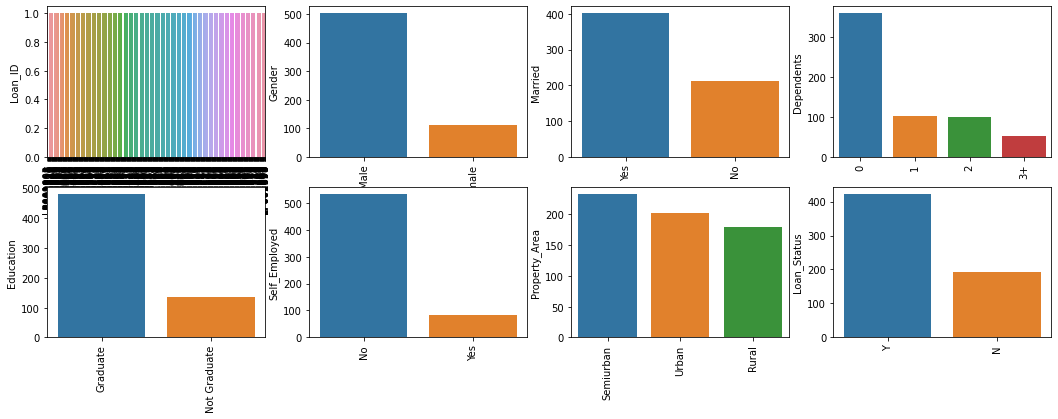

In [24]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,36))
index = 1
for col in object_cols :
    y = df[col].value_counts()
    plt.subplot(11,4,index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index +=1

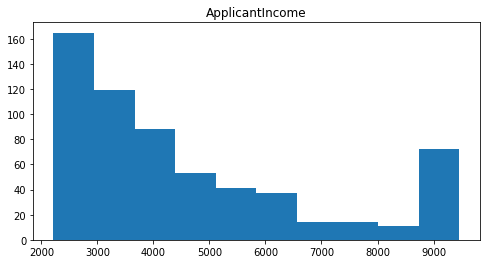

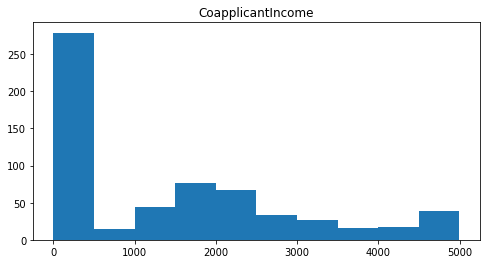

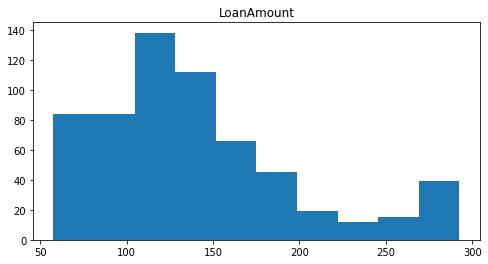

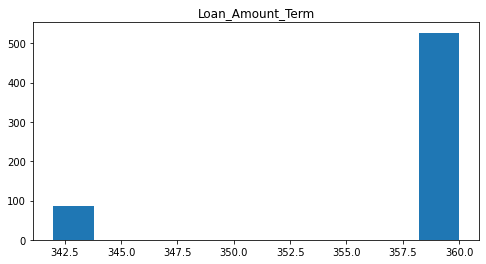

In [25]:
num=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']
for column in num:
    plt.figure(figsize=(8,4))
    plt.hist(df[column])
    plt.title(column)
    plt.show()

In [26]:
df.Loan_Status.replace('N',0,inplace=True)
df.Loan_Status.replace('Y',1,inplace=True)

In [27]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,1


In [37]:
from sklearn.preprocessing import LabelEncoder
df['Education']=LabelEncoder().fit_transform(df['Education'])
df['Dependents']=LabelEncoder().fit_transform(df['Dependents'])
df['Self_Employed']=LabelEncoder().fit_transform(df['Self_Employed'])
df['Gender']=LabelEncoder().fit_transform(df['Gender'])
df['Married']=LabelEncoder().fit_transform(df['Married'])
df['Property_Area']=LabelEncoder().fit_transform(df['Property_Area'])

<AxesSubplot:>

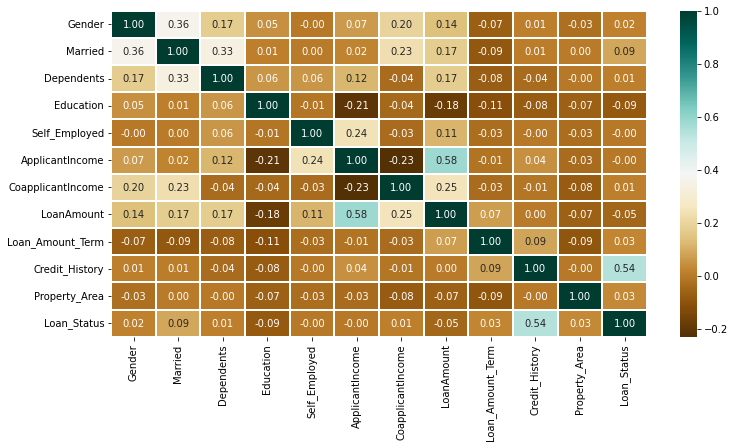

In [39]:
plt.figure(figsize=(12,6))
  
sns.heatmap(df.corr(),cmap='BrBG',fmt='.2f', linewidths=2,annot=True)

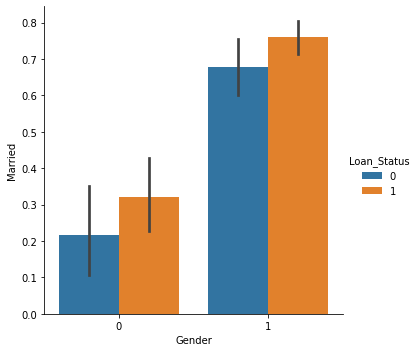

In [59]:
sns.catplot(x="Gender", y="Married",
            hue="Loan_Status", 
            kind="bar", 
            data=df)

In [44]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae,median_absolute_error as mee,classification_report as cr,accuracy_score as ac

In [45]:
df2=df
df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849.0,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583.0,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000.0,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583.0,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000.0,0.0,141.000000,360.0,1.0,2,1


In [46]:
col=['Loan_ID','Gender','Married','CoapplicantIncome','Loan_Amount_Term','Property_Area']
df2=df2.drop(columns=col,axis=1)
df2

,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Credit_History,Loan_Status
0,0,0,0,5849.0,146.412162,1.0,1
1,1,0,0,4583.0,128.000000,1.0,0
2,0,0,1,3000.0,66.000000,1.0,1
3,0,1,0,2583.0,120.000000,1.0,1
4,0,0,0,6000.0,141.000000,1.0,1
...,...,...,...,...,...,...,...
609,0,0,0,2900.0,71.000000,1.0,1
610,3,0,0,4106.0,57.755000,1.0,1
611,1,0,0,8072.0,253.000000,1.0,1
612,2,0,0,7583.0,187.000000,1.0,1


In [47]:
x=df2[['Dependents','Education','Self_Employed','ApplicantIncome','LoanAmount','Credit_History']]
y=df2[['Loan_Status']]

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=40)

In [49]:
from sklearn.tree import DecisionTreeClassifier 
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [50]:
y_pre1 = model.predict(x_test)
y_pre1

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1],
      dtype=int64)

In [51]:
from sklearn.model_selection import cross_val_score
print(ac(y_test,y_pre1)*100)
sco1=(cross_val_score(model,x,y,cv=5))
print(np.mean(sco1)*100)

72.07792207792207
69.54951352792216


Text(0.5, 1.0, 'Output Confusion Matrix')

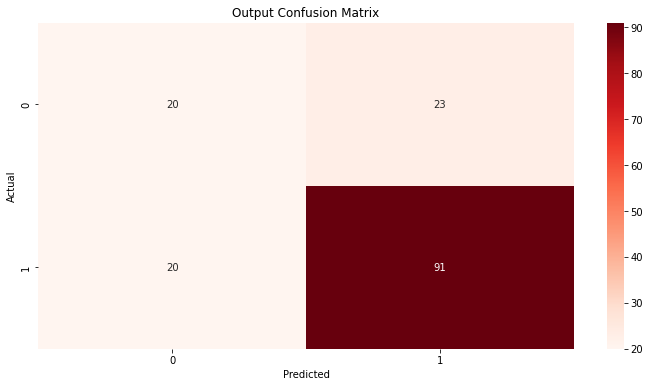

In [71]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pre1)
plt.figure(figsize=(12,6))
fg=sns.heatmap(cm,annot=True,cmap="Reds")
figure=fg.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Output Confusion Matrix")

In [53]:
newinput=[[0,0,0,5849.0,146.412162,1.0]]
output1=model.predict(newinput)
output1

c:\users\anubhab\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [54]:
from sklearn.naive_bayes import GaussianNB  
classifier1 = GaussianNB()  
classifier1.fit(x_train, y_train)

c:\users\anubhab\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [55]:
y_pred3= classifier1.predict(x_test)

In [56]:
print(ac(y_test,y_pred3)*100)
sco3=(cross_val_score(classifier1,x,y,cv=5))
print(np.mean(sco3)*100)

81.16883116883116
80.9462881514061


c:\users\anubhab\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\anubhab\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\anubhab\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\anubhab\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1111: D

In [57]:
newinput1=[[0,0,0,5849.0,146.412162,1.0]]
output11=classifier1.predict(newinput1)
output11

c:\users\anubhab\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1], dtype=int64)